<a href="https://colab.research.google.com/github/vladijarosz/Mercado-de-Valores/blob/main/Descripcion_acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
ypfd = yf.download("YPFD.BA", start="2023-12-01", end="2025-01-01", progress=False)
tgno4 = yf.download("TGNO4.BA", start="2023-12-01", end="2025-01-01", progress=False)
pamp = yf.download("PAMP.BA", start="2023-12-01", end="2025-01-01", progress=False)
meli = yf.download("MELI.BA", start="2023-12-01", end="2025-01-01", progress=False)
harg = yf.download("HARG.BA", start="2023-12-01", end="2025-01-01", progress=False)
alua = yf.download("ALUA.BA", start="2023-12-01", end="2025-01-01", progress=False)
bbra = yf.download("BBRA.BA", start="2023-12-01", end="2025-01-01", progress=False)
txar = yf.download("TXAR.BA", start="2023-12-01", end="2025-01-01", progress=False)
edn  = yf.download("EDN.BA",  start="2023-12-01", end="2025-01-01", progress=False)
moli = yf.download("MOLI.BA", start="2023-12-01", end="2025-01-01", progress=False) # Added download for MOLI.BA

/tmp/ipython-input-4123608914.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:4: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-4123608914.py:7: FutureWarning:

YF.download() has changed argument auto_adjust default to True

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BBRA.BA']: YFTzMissingError('possibly delisted; no timezone found')
/tmp/ipython-input-4123608914.py:8: FutureWarning:

YF.download() ha

In [89]:
meli

Price,Close,High,Low,Open,Volume
Ticker,MELI.BA,MELI.BA,MELI.BA,MELI.BA,MELI.BA
Date,,,,,
2023-12-01,24820.5,25099.0,22600.0,23000.0,29753
2023-12-04,23590.0,25498.0,23300.0,24999.0,20869
2023-12-05,23858.0,24000.0,22806.0,23724.0,17419
2023-12-06,24489.5,25000.0,23826.0,24000.0,22061
2023-12-07,26304.0,26599.0,24489.5,24489.5,28711
...,...,...,...,...,...
2024-12-23,16875.0,17400.0,16750.0,16800.0,163415
2024-12-24,17075.0,17200.0,16925.0,17000.0,35321


In [90]:
import pandas as pd

# Asegurar que el índice es datetime (por las dudas)
meli.index = pd.to_datetime(meli.index)

# Crear máscara: fechas anteriores al 23/01/2024
mask = meli.index < pd.Timestamp("2024-01-24")

# Dividir TODAS las columnas por 2 para esas fechas
meli.loc[mask] = meli.loc[mask]/2
meli

/tmp/ipython-input-1538860366.py:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[14876.5 10434.5  8709.5 11030.5 14355.5  6925.  12151.5  8362.   7447.5
 12610.5  7398.  10124.   7946.5  9547.5  2312.5 13215.5 12739.   7912.
 10721.5  6742.5  6690.5 13591.  16420.5 19299.5 16358.5 14779.5  7909.
 10297.  10192.  13411.  10380.5  8093.5 12613.  12255.5  5822. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Price,Close,High,Low,Open,Volume
Ticker,MELI.BA,MELI.BA,MELI.BA,MELI.BA,MELI.BA
Date,,,,,
2023-12-01,12410.25,12549.5,11300.00,11500.00,14876.5
2023-12-04,11795.00,12749.0,11650.00,12499.50,10434.5
2023-12-05,11929.00,12000.0,11403.00,11862.00,8709.5
2023-12-06,12244.75,12500.0,11913.00,12000.00,11030.5
2023-12-07,13152.00,13299.5,12244.75,12244.75,14355.5
...,...,...,...,...,...
2024-12-23,16875.00,17400.0,16750.00,16800.00,163415.0
2024-12-24,17075.00,17200.0,16925.00,17000.00,35321.0


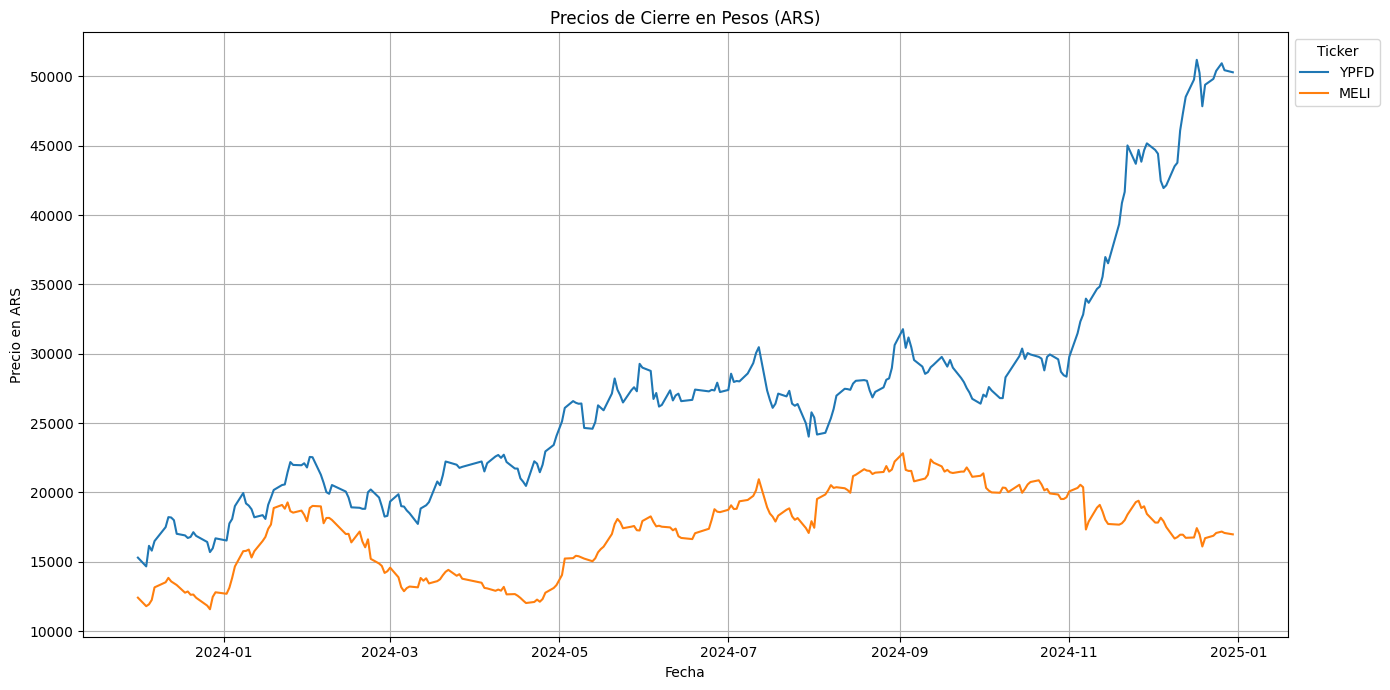

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

# Diccionario con todos los tickers descargados
tickers_data = {
    'YPFD': ypfd,

    'MELI': meli,

}

# Construir el DataFrame solo con los cierres válidos
df_close = pd.DataFrame()
for name, df in tickers_data.items():
    if not df.empty and 'Close' in df.columns:
        df_close[name] = df['Close']

# Eliminar fechas sin datos
df_close = df_close.dropna(how='all')

# Graficar
plt.figure(figsize=(14, 7))
for col in df_close.columns:
    plt.plot(df_close.index, df_close[col], label=col)

plt.title("Precios de Cierre en Pesos (ARS)")
plt.xlabel("Fecha")
plt.ylabel("Precio en ARS")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()


In [92]:
variaciones_list = []

for ticker, df in tickers_data.items():
    # Skip processing if the DataFrame is empty
    if df.empty:
        print(f"Skipping {ticker} due to empty DataFrame.")
        continue

    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    # Access the 'Close' price using the MultiIndex
    try:
        col_precio = ('Close', f'{ticker}.BA')
        mensual = df[col_precio].resample('M').agg(['first', 'last'])
        mensual['variacion_%'] = (mensual['last'] - mensual['first']) / mensual['first']

        variacion_ticker = mensual[['variacion_%']].rename(columns={'variacion_%': ticker})

        variaciones_list.append(variacion_ticker)
    except KeyError:
        print(f"Skipping {ticker} due to missing 'Close' column.")
        continue


# Combinar todos los tickers
variaciones_mensuales_df = pd.concat(variaciones_list, axis=1)
variaciones_mensuales_df




/tmp/ipython-input-2698109054.py:15: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-2698109054.py:15: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



,YPFD,MELI
Date,,
2023-12-31,0.090953,0.031164
2024-01-31,0.318723,0.412643
2024-02-29,-0.188325,-0.241456
2024-03-31,0.129050,-0.054719
2024-04-30,0.082599,-0.012645
2024-05-31,0.154439,0.277038
2024-06-30,-0.052964,0.016803
2024-07-31,-0.058977,-0.043719
2024-08-31,0.205709,0.273639


In [93]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preparación (igual que antes)
variaciones_list = []

for ticker, df in tickers_data.items():
    if df.empty:
        print(f"Skipping {ticker} due to empty DataFrame.")
        continue

    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    try:
        col_precio = ('Close', f'{ticker}.BA')
        mensual = df[col_precio].resample('M').agg(['first', 'last'])
        mensual['variacion_%'] = (mensual['last'] - mensual['first']) / mensual['first'] * 100
        # Keep 'variacion_%' and rename it later if needed, or add ticker as a column
        mensual['Ticker'] = ticker
        variaciones_list.append(mensual[['variacion_%', 'Ticker']]) # Append with 'variacion_%' and 'Ticker' columns
    except KeyError:
        print(f"Skipping {ticker} due to missing 'Close' column.")
        continue

# Combinar y pivotear
variaciones_df = pd.concat(variaciones_list)
variaciones_df.reset_index(inplace=True)

pivot_df = variaciones_df.pivot(index='Date', columns='Ticker', values='variacion_%').sort_index()
acumulado_df = (1 + pivot_df / 100).cumprod() * 100 - 100  # Acumulado compuesto

# Colores personalizados
colores = {
    'YPF': 'blue',
    'MELI': 'gold'
}

# Crear figura con ejes dobles
fig = make_subplots(specs=[[{"secondary_y": True}]])

x_vals = pivot_df.index

# Agregar barras de variación mensual
for ticker in pivot_df.columns:
    color = colores.get(ticker, 'skyblue')  # color por defecto si no está

    fig.add_trace(
        go.Bar(
            x=x_vals,
            y=pivot_df[ticker],
            name=f"{ticker} mensual",
            marker=dict(color=color)
        ),
        secondary_y=False
    )

# Agregar líneas de acumulado
for ticker in acumulado_df.columns:
    color = colores.get(ticker, 'skyblue')

    fig.add_trace(
        go.Scatter(
            x=x_vals,
            y=acumulado_df[ticker],
            name=f"{ticker} acumulado",
            mode='lines+markers',
            line=dict(dash='dash', color=color),
            marker=dict(symbol='circle', color=color)
        ),
        secondary_y=True
    )
# Configurar layout
fig.update_layout(
    title_text="Variaciones mensuales y acumuladas por ticker",
    barmode='group',
    xaxis_title="Mes",
    yaxis_title="Variación mensual (%)",  # Eje izquierdo
    legend_title="Ticker",
    template='plotly_white',
    width=1100,
    height=600
)

# Título para el eje derecho
fig.update_yaxes(title_text="Acumulado (%)", secondary_y=True)

# Forzar ambos ejes Y a tener el cero alineado
# Usamos el mínimo común y máximo común
y1_range = [pivot_df.min().min(), pivot_df.max().max()]
y2_range = [acumulado_df.min().min(), acumulado_df.max().max()]
y1_min, y1_max = y1_range
y2_min, y2_max = y2_range

# Elegimos 0 como punto de anclaje
zero_ratio_y1 = abs(0 - y1_min) / (y1_max - y1_min) if y1_max != y1_min else 0.5
zero_ratio_y2 = abs(0 - y2_min) / (y2_max - y2_min) if y2_max != y2_min else 0.5

# Ajustar y2_range para que el cero esté en la misma proporción
rango2 = y2_max - y2_min
nuevo_min_y2 = 0 - zero_ratio_y1 * rango2
nuevo_max_y2 = 0 + (1 - zero_ratio_y1) * rango2


# Update both y-axes ranges
fig.update_yaxes(range=[y1_min, y1_max], secondary_y=False)
fig.update_yaxes(range=[nuevo_min_y2, nuevo_max_y2], secondary_y=True)
fig.update_yaxes(showgrid=True, zeroline=True)

fig.show()




/tmp/ipython-input-283747429.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/tmp/ipython-input-283747429.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [94]:
import plotly.graph_objects as go
import pandas as pd

# Crear figura
fig = go.Figure()

# Agregar una línea por cada ticker
for ticker in df_close.columns:
    fig.add_trace(go.Scatter(
        x=df_close.index,
        y=df_close[ticker],
        mode='lines',
        name=ticker
    ))

# Layout
fig.update_layout(
    title='Precios de Cierre en Pesos (ARS)',
    xaxis_title='Fecha',
    yaxis_title='Precio (ARS)',
    template='plotly_white',
    legend_title='Ticker',
    legend=dict(
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='left',
        x=1.02
    )
)

fig.show()


In [95]:
!wget -O MEP.csv "https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv"

import pandas as pd
df_mep = pd.read_csv("MEP.csv")



--2025-12-07 01:04:36--  https://github.com/vladijarosz/Mercado-de-Valores/raw/refs/heads/main/datos/MEP.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/MEP.csv [following]
--2025-12-07 01:04:36--  https://raw.githubusercontent.com/vladijarosz/Mercado-de-Valores/refs/heads/main/datos/MEP.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149475 (146K) [text/plain]
Saving to: ‘MEP.csv’

MEP.csv             100%[===================>] 145.97K  --.-KB/s    in 0.004s  

2025-12-07 01:04:36 (34.1 MB/s) - ‘MEP.csv’ saved [149475/149475]



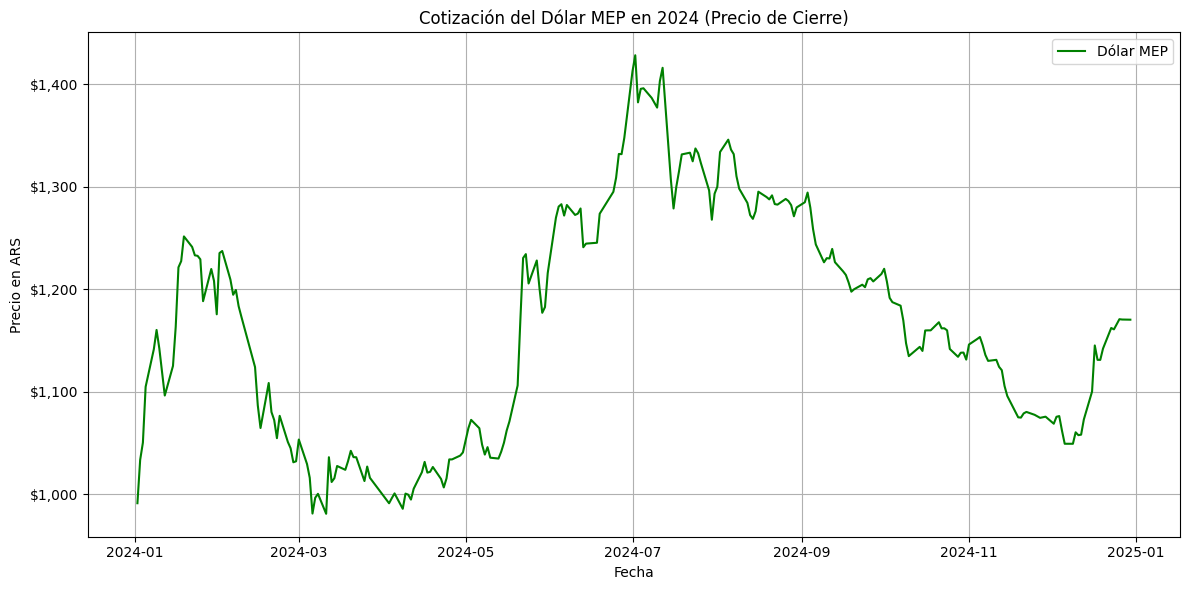

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Asegurar que la columna 'fecha' existe y convertirla a tipo datetime
if 'fecha' in df_mep.columns:
    df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
else:
    raise ValueError("La columna 'fecha' no existe en el DataFrame.")

# Ordenar el DataFrame por fecha
df_mep = df_mep.sort_values('fecha', ascending=True)

# Filtrar datos solo para el año 2024
df_mep_2024 = df_mep[df_mep['fecha'].dt.year == 2024]

# Graficar la cotización del Dólar MEP en 2024
plt.figure(figsize=(12, 6))
plt.plot(df_mep_2024['fecha'], df_mep_2024['ultimo'], color='green', label='Dólar MEP')
plt.title("Cotización del Dólar MEP en 2024 (Precio de Cierre)")
plt.xlabel("Fecha")
plt.ylabel("Precio en ARS")
plt.grid(True)
plt.legend()

# Formatear el eje Y con símbolo de pesos y sin decimales
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


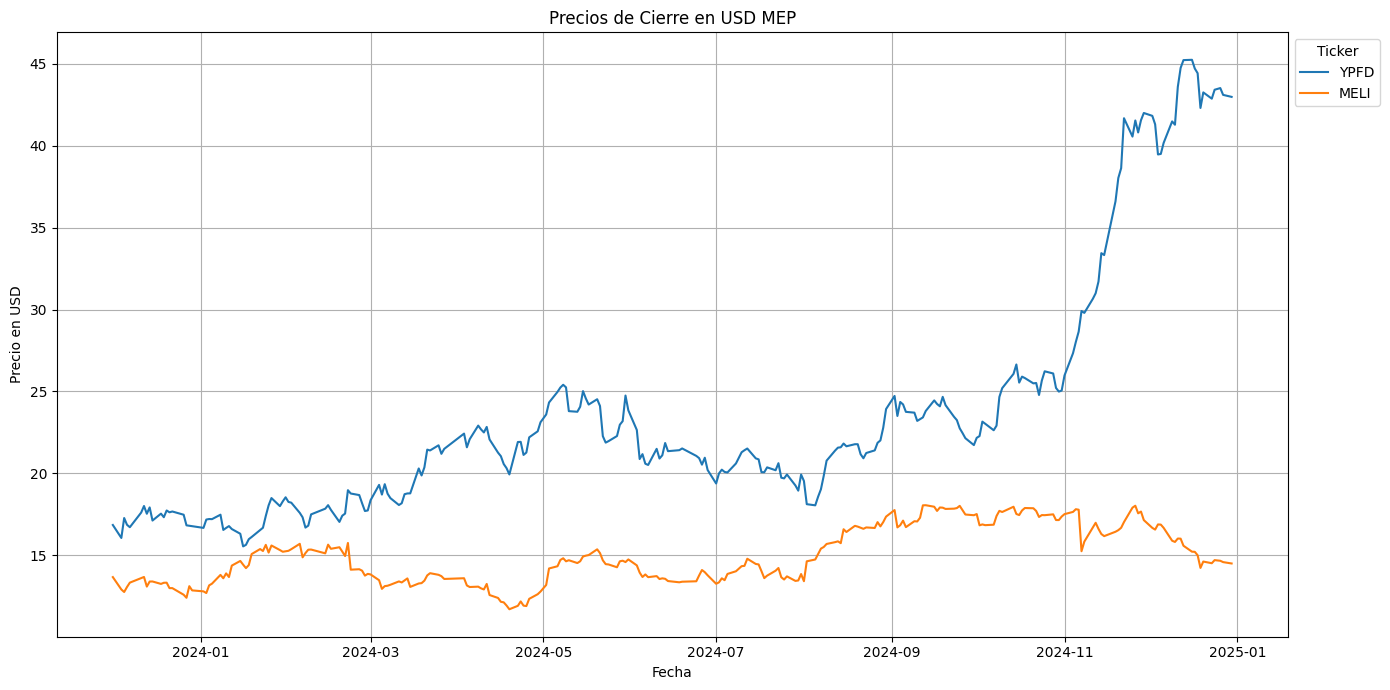

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import yfinance as yf

# Asegurar formato de fechas en MEP
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
df_mep = df_mep.sort_values('fecha')

# Tickers descargados
tickers_data = {
    'YPFD': ypfd,

    'MELI': meli,

}

usd_series = []

for name, df in tickers_data.items():
    if not df.empty and 'Close' in df.columns:
        # Flatten the column index
        df.columns = df.columns.get_level_values(0)

        # Always reset index for date to be a column
        df = df.reset_index()

        # Detect if the date column is 'Date' or 'index'
        if 'Date' in df.columns:
            df = df.rename(columns={'Date': 'fecha'})
        elif 'index' in df.columns:
            df = df.rename(columns={'index': 'fecha'})

        df = df.rename(columns={'Close': name})
        df['fecha'] = pd.to_datetime(df['fecha'])
        df = df[[name, 'fecha']].copy()

        # Asegurar formato y plano también en df_mep
        df_mep = df_mep[['fecha', 'ultimo']].copy()
        df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])

        # Merge con MEP
        merged = pd.merge_asof(
            df.sort_values('fecha'),
            df_mep.sort_values('fecha'),
            on='fecha',
            direction='backward'
        )


        # Calcular en USD
        merged[f'{name}_usd'] = merged[name] / merged['ultimo']
        usd_series.append(merged[['fecha', f'{name}_usd']])

# Unir todas las series
df_usd = usd_series[0]
for s in usd_series[1:]:
    df_usd = df_usd.merge(s, on='fecha', how='inner')

df_usd.set_index('fecha', inplace=True)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_usd.columns:
    plt.plot(df_usd.index, df_usd[col], label=col.replace('_usd', ''))

plt.title("Precios de Cierre en USD MEP")
plt.xlabel("Fecha")
plt.ylabel("Precio en USD")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Ticker')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

In [98]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Asegurar que el índice es datetime
df_usd.index = pd.to_datetime(df_usd.index)

# 1) Resample mensual usando 'ME' (month-end)
mensual = df_usd.resample('ME').agg(['first', 'last'])

first = mensual.xs('first', level=1, axis=1)
last  = mensual.xs('last',  level=1, axis=1)

# 2) Variación mensual %
var_mensual = (last - first) / first * 100
var_mensual.columns = [c.replace('_usd', '') for c in var_mensual.columns]

# 3) Acumulado
acumulado = (1 + var_mensual / 100).cumprod() * 100 - 100

# 🎨 Tus colores principales
colores_barra = {
    'MELI': '#FFE082',   # amarillo suave
    'YPFD': '#64B5F6',   # azul claro
}

colores_linea = {
    'MELI': '#FFB300',   # amarillo fuerte
    'YPFD': '#1E88E5',   # azul fuerte
}

# 🎨 Color por defecto para tickers que no definiste (ej. TGNO4)
color_barra_default = '#B0BEC5'  # gris suave
color_linea_default = '#546E7A'  # gris oscuro

# 4) Crear figura
fig = make_subplots(specs=[[{"secondary_y": True}]])

x_vals = var_mensual.index

# --- Barras ---
for ticker in var_mensual.columns:
    fig.add_trace(
        go.Bar(
            x=x_vals,
            y=var_mensual[ticker],
            name=f"{ticker} variación mensual",
            marker=dict(color=colores_barra.get(ticker, color_barra_default)),
        ),
        secondary_y=False
    )

# --- Líneas acumuladas ---
for ticker in acumulado.columns:
    fig.add_trace(
        go.Scatter(
            x=x_vals,
            y=acumulado[ticker],
            name=f"{ticker} acumulado",
            mode='lines+markers',
            line=dict(
                color=colores_linea.get(ticker, color_linea_default),
                dash='dash'
            ),
            marker=dict(
                color=colores_linea.get(ticker, color_linea_default)
            ),
        ),
        secondary_y=True
    )

# Layout
fig.update_layout(
    title="Variaciones mensuales y acumuladas en USD MEP",
    barmode='group',
    xaxis_title="Mes",
    yaxis_title="Variación mensual (%)",
    legend_title="Serie",
    template='plotly_white',
    width=1100,
    height=600,
)

fig.update_yaxes(title_text="Acumulado (%)", secondary_y=True)
fig.update_yaxes(showgrid=True, zeroline=True)

fig.show()


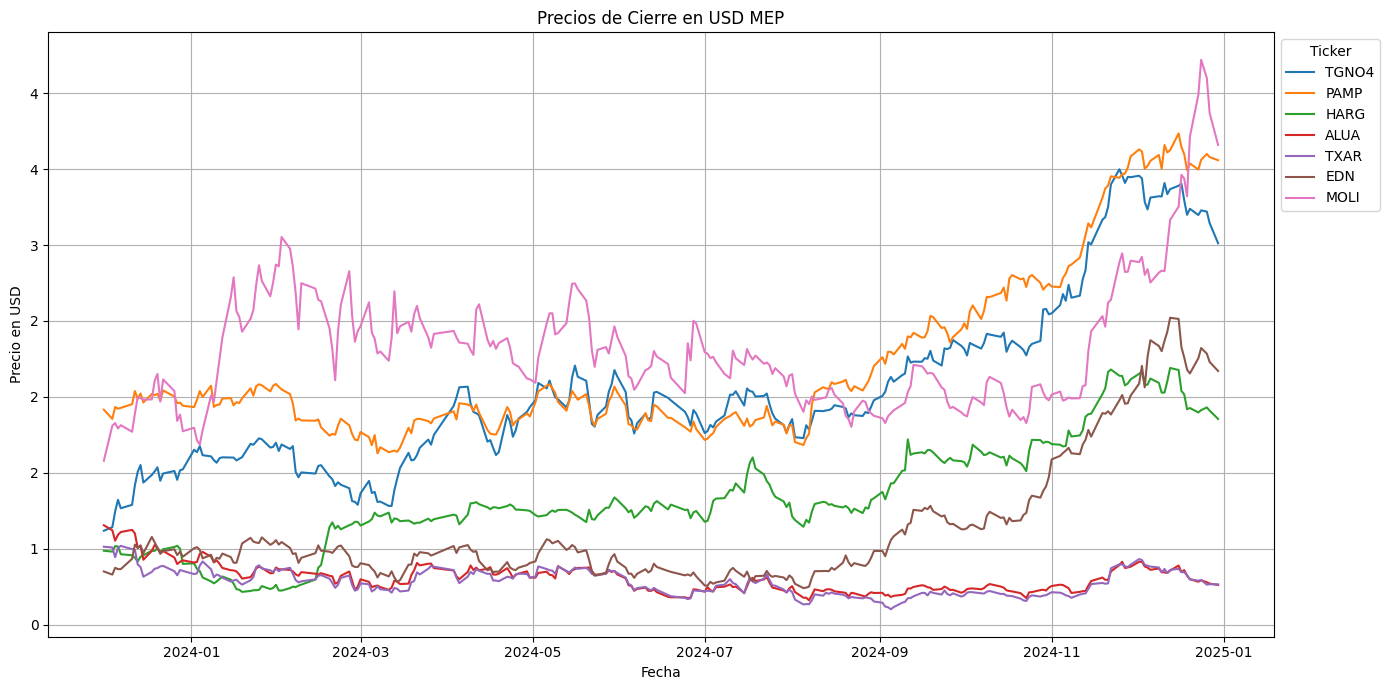

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import yfinance as yf

# Asegurar formato de fechas en MEP
df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])
df_mep = df_mep.sort_values('fecha')

# Tickers descargados
tickers_data = {

    'TGNO4': tgno4,
    'PAMP': pamp,

    'HARG': harg,
    'ALUA': alua,
    'BBRA': bbra,
    'TXAR': txar,
    'EDN': edn,
    'MOLI': moli
}

usd_series = []

for name, df in tickers_data.items():
    if not df.empty and 'Close' in df.columns:
        # Flatten the column index
        df.columns = df.columns.get_level_values(0)

        # Always reset index for date to be a column
        df = df.reset_index()

        # Detect if the date column is 'Date' or 'index'
        if 'Date' in df.columns:
            df = df.rename(columns={'Date': 'fecha'})
        elif 'index' in df.columns:
            df = df.rename(columns={'index': 'fecha'})

        df = df.rename(columns={'Close': name})
        df['fecha'] = pd.to_datetime(df['fecha'])
        df = df[[name, 'fecha']].copy()

        # Asegurar formato y plano también en df_mep
        df_mep = df_mep[['fecha', 'ultimo']].copy()
        df_mep['fecha'] = pd.to_datetime(df_mep['fecha'])

        # Merge con MEP
        merged = pd.merge_asof(
            df.sort_values('fecha'),
            df_mep.sort_values('fecha'),
            on='fecha',
            direction='backward'
        )


        # Calcular en USD
        merged[f'{name}_usd'] = merged[name] / merged['ultimo']
        usd_series.append(merged[['fecha', f'{name}_usd']])

# Unir todas las series
df_usd = usd_series[0]
for s in usd_series[1:]:
    df_usd = df_usd.merge(s, on='fecha', how='inner')

df_usd.set_index('fecha', inplace=True)

# Graficar
plt.figure(figsize=(14, 7))
for col in df_usd.columns:
    plt.plot(df_usd.index, df_usd[col], label=col.replace('_usd', ''))

plt.title("Precios de Cierre en USD MEP")
plt.xlabel("Fecha")
plt.ylabel("Precio en USD")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Ticker')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.tight_layout()
plt.show()

In [100]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Asegurar que el índice es datetime
df_usd.index = pd.to_datetime(df_usd.index)

# 1) Resample mensual: precio primero y último del mes
mensual = df_usd.resample('M').agg(['first', 'last'])

# Separar first y last (quita el MultiIndex de columnas)
first = mensual.xs('first', level=1, axis=1)
last  = mensual.xs('last',  level=1, axis=1)

# 2) Variación mensual en %: (último - primero) / primero * 100
var_mensual = (last - first) / first * 100    # DataFrame: filas = mes, columnas = YPFD_usd, MELI_usd

# 3) Renombrar columnas quitando el sufijo "_usd"
var_mensual.columns = [c.replace('_usd', '') for c in var_mensual.columns]

# 4) Acumulado compuesto: (1 + r)^t - 1, expresado en %
acumulado = (1 + var_mensual / 100).cumprod() * 100 - 100

# 5) Crear figura con eje secundario
fig = make_subplots(specs=[[{"secondary_y": True}]])

x_vals = var_mensual.index

# --- Barras de variación mensual ---
for ticker in var_mensual.columns:
    fig.add_trace(
        go.Bar(
            x=x_vals,
            y=var_mensual[ticker],
            name=f"{ticker} variación mensual",
        ),
        secondary_y=False
    )

# --- Líneas de acumulado ---
for ticker in acumulado.columns:
    fig.add_trace(
        go.Scatter(
            x=x_vals,
            y=acumulado[ticker],
            name=f"{ticker} acumulado",
            mode='lines+markers',
            line=dict(dash='dash'),
        ),
        secondary_y=True
    )

# 6) Layout
fig.update_layout(
    title="Variaciones mensuales y acumuladas en USD MEP",
    barmode='group',
    xaxis_title="Mes",
    yaxis_title="Variación mensual (%)",   # eje izquierdo
    legend_title="Serie",
    template='plotly_white',
    width=1100,
    height=600,
)

# Eje derecho: acumulado
fig.update_yaxes(title_text="Acumulado (%)", secondary_y=True)

# Línea de cero visible en ambos ejes
fig.update_yaxes(showgrid=True, zeroline=True)

fig.show()


/tmp/ipython-input-710677137.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [101]:
merval = yf.download("^MERV", start="2024-01-01", end="2025-01-01", progress=False)
syp = yf.download("SPY.BA", start="2024-01-01", end="2025-01-01", progress=False)

/tmp/ipython-input-3746418738.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

/tmp/ipython-input-3746418738.py:2: FutureWarning:

YF.download() has changed argument auto_adjust default to True



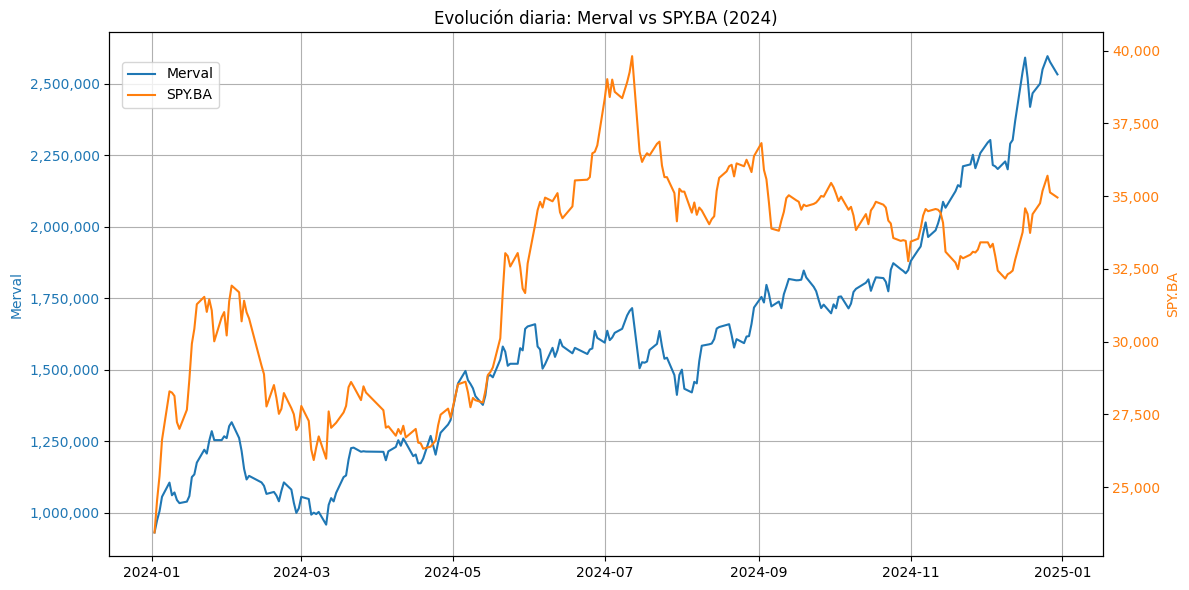

In [102]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Crear DataFrame conjunto con las dos series de cierre
df_plot = merval[['Close']].rename(columns={'Close': 'Merval'})
df_plot['SPY.BA'] = syp['Close']
df_plot.dropna(inplace=True)

# Graficar
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo: Merval
ax1.plot(df_plot.index, df_plot['Merval'], color='tab:blue', label='Merval')
ax1.set_ylabel('Merval', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))
ax1.grid(True)

# Eje derecho: SPY.BA
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['SPY.BA'], color='tab:orange', label='SPY.BA')
ax2.set_ylabel('SPY.BA', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Título y leyenda
plt.title('Evolución diaria: Merval vs SPY.BA (2024)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()
